In [7]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
df_data = pd.read_csv('./zipcode2014/14zpallagi.csv')
print df_data.shape
#Filtering out Zipcode = 0 and 99999. Dirty Data
df_data = df_data[(df_data['zipcode'] != 0) & (df_data['zipcode'] != 99999)]
print df_data.shape
df_data.head()

(166686, 127)
(166074, 127)


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
6,1,AL,35004,1,1510.0,970.0,230.0,270.0,740.0,2130.0,...,740.0,645.0,0.0,0.0,0.0,0.0,130.0,112.0,1300.0,2660.0
7,1,AL,35004,2,1280.0,590.0,370.0,270.0,630.0,2450.0,...,1090.0,2879.0,0.0,0.0,0.0,0.0,180.0,255.0,1090.0,2827.0
8,1,AL,35004,3,920.0,280.0,510.0,110.0,470.0,2070.0,...,890.0,4651.0,0.0,0.0,0.0,0.0,190.0,357.0,720.0,1962.0
9,1,AL,35004,4,630.0,100.0,490.0,50.0,300.0,1650.0,...,630.0,5225.0,0.0,0.0,0.0,0.0,130.0,312.0,490.0,1454.0
10,1,AL,35004,5,590.0,40.0,530.0,0.0,300.0,1660.0,...,580.0,9419.0,0.0,0.0,0.0,0.0,200.0,625.0,380.0,1553.0


This is a dataset of individual income tax returns. Definition of Individual Accredited Individual.
<br>a) natural person who has individual net worth, or joint net worth with the person's spouse, that exceeds 1 million at the time of the purchase, or has assets under management of $1 million or above, excluding the value of the individual's primary residence;
<br>b) natural person with income exceeding 200,000 in each of the two most recent years or joint income with a spouse exceeding 300,000 for those years and a reasonable expectation of the same income level in the current year;

<br>We don't have 2 consecutive years of data here. So let as assume that any natural person who has an Total Income  >= 200,000 in the income tax return for the year 2014 would make the same in the next year i.e. 2015. Using that logic, we can define the 
        <li>* Accredited investor as someone has an average Total Income of >= 200,000.
        <li>* Number of returns (N1) as a proxy for the number of investors in the zipcode.

<br>Some interesting variables from the SOI Data
<br># STATE
<br># Zipcode
<br># A00100 - Adjusted Gross Income Amount
<br># A02650 - Total income Amount
<br># N1 - Number of returns
<br># MARS1 - Number of single returns
<br># MARS2 - Number of joint returns
<br># N85300 - Number of returns with net investment income tax
<br># A85300 - Net investment income tax amount
<br># A18500 - Real estate taxes amount
<br># N18300 - Number of returns with taxes paid
<br># A18300 - Taxes paid amount
<br># N00200 - Number of returns with salaries and wages
<br># A00200 - Salaries and wages amount
<br># A10300 - Total tax liability amount
<br># A06500 - Income tax amount 
<br># N00600 - Number of returns with ordinary dividends 
<br># A00600 - Ordinary dividends amount
<br># N00650 - Number of returns with qualified dividends
<br># A00650 - Qualified dividends amount
<br># N00900 - Number of returns with business or professional net income (less loss)
<br># A00900 - Business or professional net income (less loss) amount
<br># N01000 - Number of returns with net capital gain (less loss)
<br># A01000 - Net capital gain (less loss) amount
<br># N18500 - Number of returns with real estate taxes
<br># A18500 - Real estate taxes amount

In [9]:
#Defining Average Total Income in Each Category.
df_data['avg_totalincome'] = df_data['A02650']/df_data['N1']
#Since the values are in 1000's.
df_data['accredited'] = np.where(df_data['avg_totalincome'] > 200, 1, 0)
#Added the two above columns as the last 2 columns in the existing SOI data.
print df_data.shape
df_data.tail()

(166074, 129)


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,avg_totalincome,accredited
166675,56,WY,83414,2,40.0,20.0,0.0,0.0,20.0,90.0,...,0.0,0.0,0.0,0.0,30.0,42.0,30.0,97.0,39.125000,0
166676,56,WY,83414,3,20.0,0.0,30.0,0.0,40.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,110.0,64.350000,0
166677,56,WY,83414,4,30.0,20.0,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.366667,0
166678,56,WY,83414,5,30.0,0.0,20.0,0.0,30.0,70.0,...,0.0,0.0,0.0,0.0,30.0,722.0,20.0,149.0,161.833333,0
166679,56,WY,83414,6,30.0,0.0,30.0,0.0,30.0,70.0,...,0.0,0.0,20.0,201.0,0.0,0.0,0.0,0.0,554.700000,1


## a) The total number of accredited investors by state

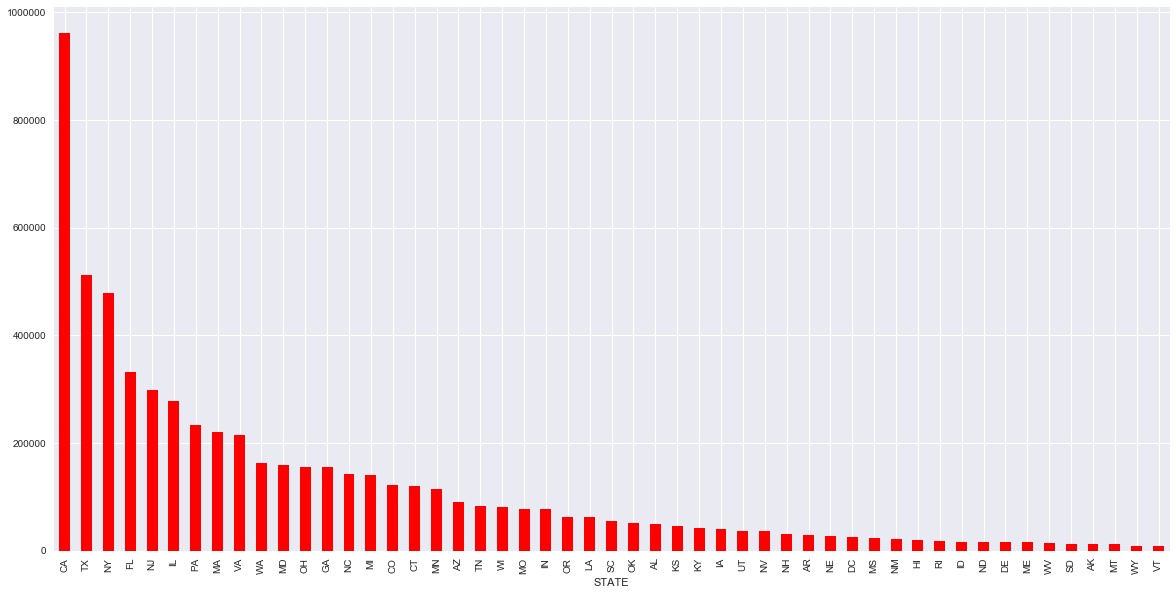

In [10]:
#1=Accredited and 0=UnAccredited
gp_accredited_state = df_data.groupby(['accredited','STATE'])
gp_accredited_state['N1'].sum()[1].sort_values(ascending=False).plot(kind='bar',color='r')

In [11]:
print gp_accredited_state['N1'].sum()[1].sort_values(ascending=False).head()

STATE
CA    961580.0
TX    512670.0
NY    478090.0
FL    331800.0
NJ    298120.0
Name: N1, dtype: float64


## b) The median or average income level by state

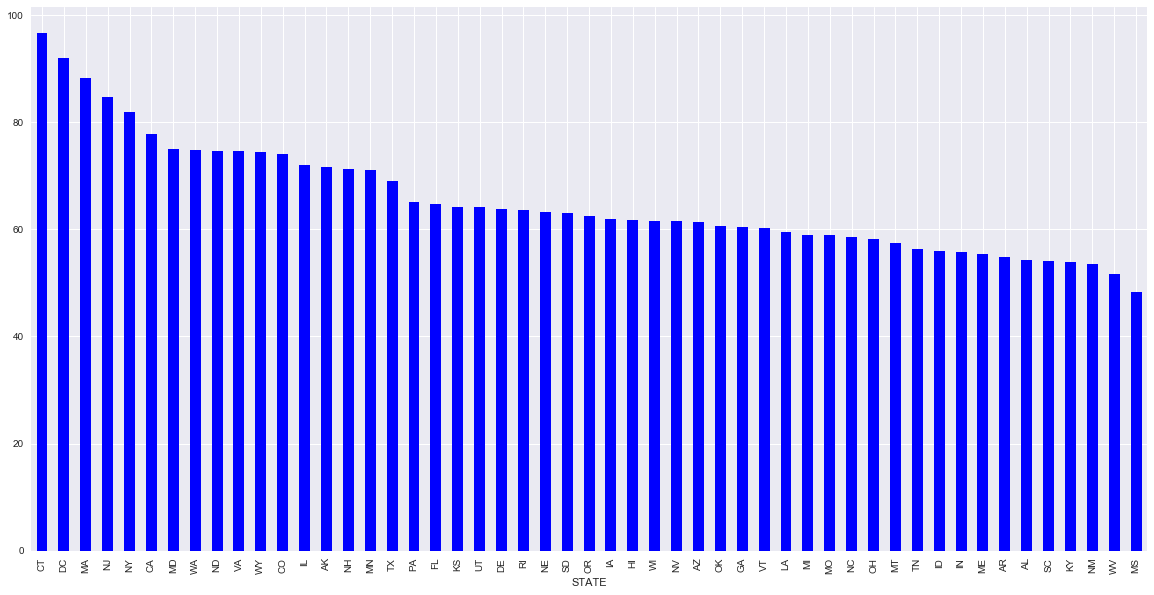

In [12]:
#b. The median or average income level by state
gp_state = df_data.groupby(['STATE'])
df_avgincome = gp_state['A02650','N1'].sum()
#Since the base data set, the amounts are in 1000's, the numbers below are in 
df_avgincome['avg_income'] = df_avgincome['A02650']/df_avgincome['N1']
df_avgincome['avg_income'].sort_values(ascending=False).plot(kind='bar',color='b')

In [13]:
df_avgincome['avg_income'].sort_values(ascending=False).head(6)

STATE
CT    96.639772
DC    91.976978
MA    88.165639
NJ    84.662807
NY    81.862094
CA    77.852213
Name: avg_income, dtype: float64

## c) A ranking of the top 5 zip codes, on a state and on a nationwide level, based on estimated number of accredited investors

In [14]:
#At National Level, the top 10 zipcodes with the highest number of accredited investors
gp_accredited_zip = df_data[df_data['accredited']==1].groupby(['STATE','zipcode'])
gp_accredited_zip['N1'].sum().sort_values(ascending=False).head(10)

STATE  zipcode
NY     10023      9410.0
TX     77494      8450.0
NY     10024      8400.0
TX     77479      7830.0
CA     95014      7800.0
MD     20854      7740.0
NY     10128      7350.0
       10011      7140.0
       10025      7090.0
       10021      6810.0
Name: N1, dtype: float64

In [15]:
#At State Level, the top 5 zipcodes with the highest number of accredited investors. Below is the synopsis of the list.
gp_accredited_state_zip = df_data[df_data['accredited']==1].groupby(['STATE','zipcode'])
s_sum = gp_accredited_state_zip['N1'].sum()
s_sum.groupby(level=0).nlargest(5)

STATE  STATE  zipcode
AK     AK     99516      1960.0
              99507      1070.0
              99577       960.0
              99515       870.0
              99502       730.0
AL     AL     35242      3690.0
              35213      1680.0
              35223      1600.0
              35758      1590.0
              35244      1460.0
AR     AR     72712      2070.0
              72223      1790.0
              72758      1660.0
              72212       940.0
              72703       910.0
AZ     AZ     85255      4880.0
              85253      2920.0
              85718      2470.0
              85254      2360.0
              85259      2210.0
CA     CA     95014      7800.0
              94583      6660.0
              94539      6480.0
              94087      6360.0
              92130      6140.0
CO     CO     80016      3010.0
              80134      3000.0
              80126      2870.0
              80111      2860.0
              80108      2560.0
                  

In [16]:
df_state_top5zip = s_sum.groupby(level=0).nlargest(5).to_frame()
df_state_top5zip.index = df_state_top5zip.index.droplevel(0)
df_state_top5zip.rename(columns={'N1':'Investor#'}, inplace=True)
df_state_top5zip.to_excel('./State_Top5Zip_Accredited.xlsx')

## d) An estimate of the number of accredited investors that make investments

If accredited investors have Net Investment Income tax, then it is fair to assume that they make investments. The variable A85300 gives us the Net investment income tax amount.

In [17]:
# A85300 - Net investment income tax amount.
print 'Estimate of Accredited Investors with Investments:',df_data[(df_data['accredited'] ==1) & (df_data['A85300'] > 0)]['N1'].sum()
print 'Total Tax Filers:',df_data['N1'].sum()
print 'Addressable Market as % of Total Tax Payers:',(df_data[(df_data['accredited'] ==1) & (df_data['A85300'] > 0)]['N1'].sum()/df_data['N1'].sum()) *100

Estimate of Accredited Investors with Investments: 5894070.0
Total Tax Filers: 142448550.0
Addressable Market as % of Total Tax Payers: 4.13768339516


## e) The effective tax rate (i.e. total amount of federal taxes paid compared to the adjusted gross income) by zip code

The variable A06500 gives us the Income Tax Amount, and A00100 gives us the Adjusted Gross Income Amount. We can derive the effective tax rate across the zipcodes using them.

In [18]:
# Effective Tax Rate Across State and Zip Codes.
# A06500 - Income tax amount 
# A00100 - Adjusted Gross Income Amount
df_effective_taxrate = df_data.groupby(['STATE','zipcode'])['A06500','A00100'].sum()
df_effective_taxrate['effective_taxrate'] = df_effective_taxrate['A06500']/df_effective_taxrate['A00100']
print 'Avg. Income Tax Rate across the US:',df_effective_taxrate['effective_taxrate'].mean()
df_effective_taxrate.head()

Avg. Income Tax Rate across the US: 0.103350899552


A06500     A00100  effective_taxrate
STATE zipcode                                        
AK    99501     97464.0   605729.0           0.160904
      99502    161172.0  1005942.0           0.160220
      99503     66436.0   492124.0           0.134998
      99504    133886.0  1158913.0           0.115527
      99505      4685.0    89153.0           0.052550

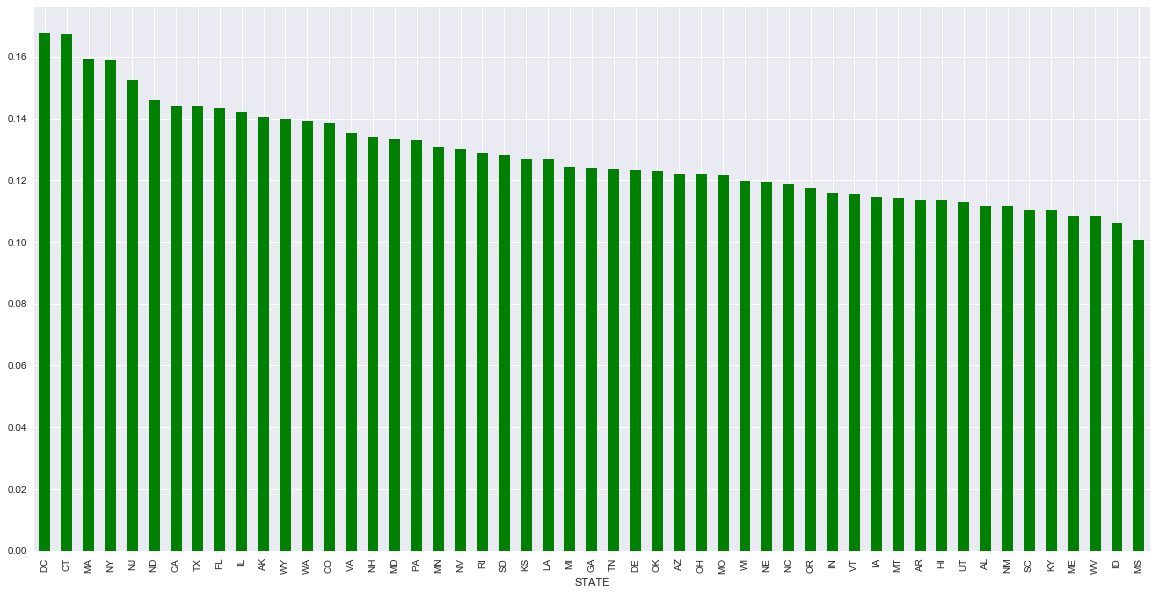

In [19]:
# Effective Tax Rate Across States
df_effective_taxrate_state = df_data.groupby(['STATE'])['A06500','A00100'].sum()
df_effective_taxrate_state['effective_taxrate'] = df_effective_taxrate_state['A06500']/df_effective_taxrate_state['A00100']
df_effective_taxrate_state['effective_taxrate'].sort_values(ascending=False).plot(kind='bar', color='g')

In [20]:
df_effective_taxrate_state['effective_taxrate'].sort_values(ascending=False).head(10)

STATE
DC    0.167712
CT    0.167478
MA    0.159176
NY    0.159073
NJ    0.152469
ND    0.145952
CA    0.144166
TX    0.144155
FL    0.143397
IL    0.142249
Name: effective_taxrate, dtype: float64

## Justification of conclusions by providing measures of statistical significance (i.e. a T-Stat or similar metric).

In order to justify our conclusion, let us try to model a simple relationship between the number of accredited only investors to their States, the Ordinary/ Dividends Amount on the return, and the number of returns with Business or Professional Incomes.

<br>The hypothesis being that investors who have dividends on their tax returns and generate professional business income / loss on the side, when combined along with their state of residence can establish the number of accredited investors.

<br>We will purposefully leave out all the variables regarding AGI / Income since accredited investors are already a function of those.

My dependent variable is the number of accredited investors. My independent variables are.
<br>STATE
<br>A00600 - Ordinary dividends amount
<br>A00900 - Business or professional net income (less loss) amount

In [21]:
#First let us filter for only accredited investors.
df_accredited = df_data[df_data['accredited'] == 1]
df_accredited.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,avg_totalincome,accredited
11,1,AL,35004,6,50.0,0.0,50.0,0.0,40.0,130.0,...,0.0,0.0,20.0,45.0,30.0,503.0,0.0,0.0,322.440000,1
29,1,AL,35007,6,220.0,0.0,200.0,0.0,150.0,660.0,...,60.0,61.0,90.0,109.0,150.0,3276.0,50.0,333.0,331.504545,1
35,1,AL,35010,6,150.0,0.0,140.0,0.0,130.0,390.0,...,50.0,53.0,80.0,282.0,80.0,1511.0,50.0,762.0,439.566667,1
47,1,AL,35016,6,100.0,0.0,90.0,0.0,80.0,300.0,...,60.0,60.0,40.0,59.0,50.0,918.0,40.0,316.0,321.570000,1
65,1,AL,35022,6,180.0,0.0,150.0,0.0,130.0,460.0,...,60.0,38.0,70.0,64.0,100.0,1436.0,60.0,371.0,290.794444,1


In [22]:
mod = smf.ols(formula='N1 ~ C(STATE) + A00600 + A00900', data=df_accredited)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     N1   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1253.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:32:59   Log-Likelihood:            -1.1700e+05
No. Observations:               16468   AIC:                         2.341e+05
Df Residuals:                   16415   BIC:                         2.345e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         55.7203     49.198      1.

In [23]:
res.pvalues[res.pvalues < 0.05].sort_values(ascending=True)

A00900            0.000000e+00
A00600            1.920460e-18
C(STATE)[T.CA]    5.382455e-04
C(STATE)[T.VA]    1.494126e-03
C(STATE)[T.IL]    3.384933e-03
C(STATE)[T.CO]    3.958469e-03
C(STATE)[T.TN]    4.176646e-03
C(STATE)[T.WA]    5.218327e-03
C(STATE)[T.GA]    1.089748e-02
C(STATE)[T.NJ]    1.553423e-02
C(STATE)[T.MD]    1.783683e-02
C(STATE)[T.AZ]    1.966836e-02
C(STATE)[T.UT]    2.061789e-02
C(STATE)[T.FL]    2.161644e-02
C(STATE)[T.DE]    4.421118e-02
dtype: float64

## Sales Team Recommendation

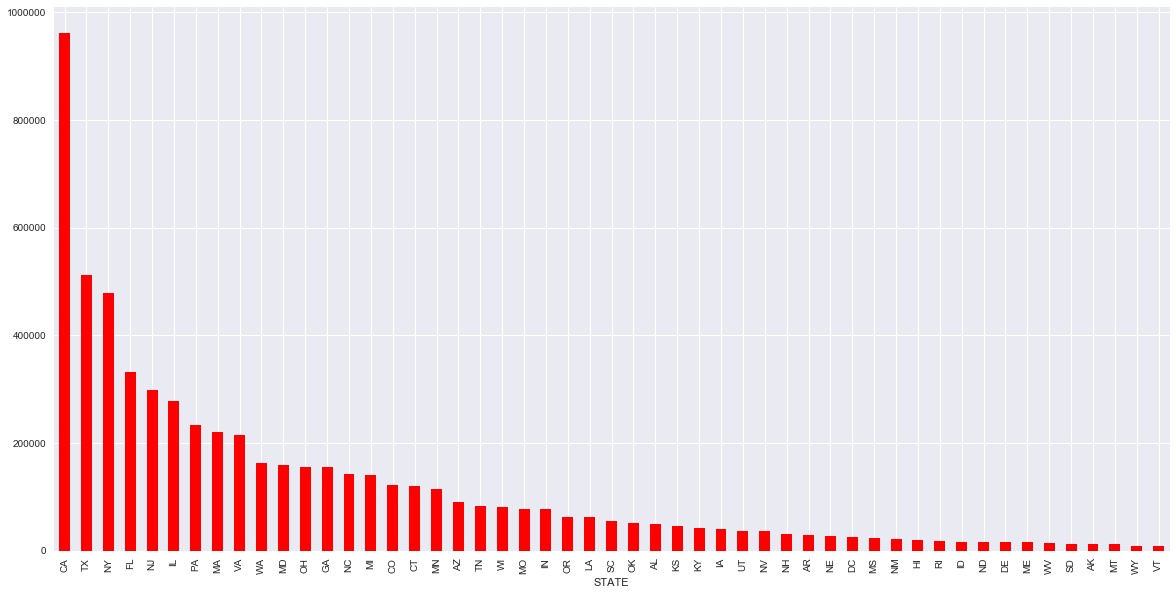

In [24]:
gp_accredited_state['N1'].sum()[1].sort_values(ascending=False).plot(kind='bar',color='r')

## Bonus Question: What statistical metric would you use to accurately identify the relationship between different data series?

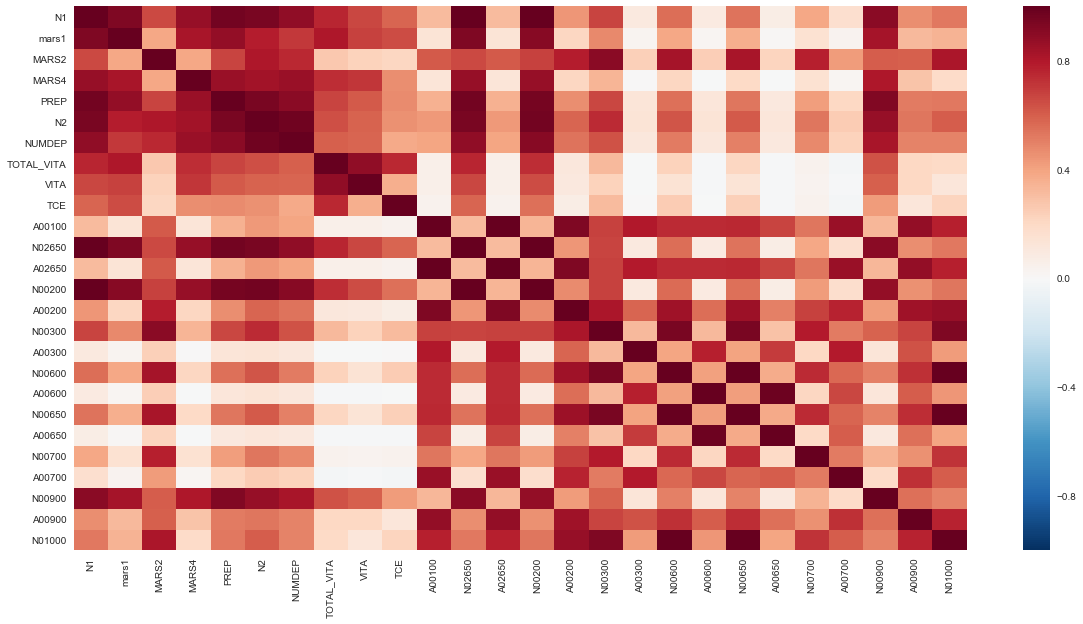

In [26]:
df_25 = df_data.ix[:,4:30]
#df_25 = df_data
corr = df_25.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)